In [2]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

# IMPORTING DATA

In [3]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip


--2021-02-22 10:06:09--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.15.112, 172.217.7.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   201MB/s    in 0.3s    

2021-02-22 10:06:10 (201 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

# MODEL BUIDLING USING INCEPTIONV3


In [6]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [7]:
pre_trained_model=InceptionV3(input_shape=(150,150,3),
                              include_top=False,
                              weights="imagenet")

87916544/87910968 [==============================] - 1s 0us/step


In [8]:
for layer in pre_trained_model.layers:
  layer.trainable = False
  

In [9]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [10]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output=last_layer.output

In [11]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = tf.keras.layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  

In [12]:
model = tf.keras.Model( pre_trained_model.input, x) 

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.0001),
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

#IMAGE DATA GENERATOR

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen= ImageDataGenerator(rescale=1/255)

In [16]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# MODEL FIT

In [17]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 27s - loss: 0.3622 - accuracy: 0.8595 - val_loss: 0.0993 - val_accuracy: 0.9660
Epoch 2/20
100/100 - 17s - loss: 0.2221 - accuracy: 0.9095 - val_loss: 0.1378 - val_accuracy: 0.9420
Epoch 3/20
100/100 - 17s - loss: 0.1992 - accuracy: 0.9255 - val_loss: 0.1445 - val_accuracy: 0.9470
Epoch 4/20
100/100 - 17s - loss: 0.1852 - accuracy: 0.9285 - val_loss: 0.0969 - val_accuracy: 0.9660
Epoch 5/20
100/100 - 17s - loss: 0.1976 - accuracy: 0.9350 - val_loss: 0.1146 - val_accuracy: 0.9570
Epoch 6/20
100/100 - 17s - loss: 0.1696 - accuracy: 0.9450 - val_loss: 0.1498 - val_accuracy: 0.9570
Epoch 7/20
100/100 - 17s - loss: 0.1901 - accuracy: 0.9320 - val_loss: 0.1229 - val_accuracy: 0.9600
Epoch 8/20
100/100 - 17s - loss: 0.1687 - accuracy: 0.9415 - val_loss: 0.1073 - val_accuracy: 0.9630
Epoch 9/20
100/100 - 17s - loss: 0.1559 - accuracy: 0.9440 - val_loss: 0.1329 - val_accuracy: 0.9620
Epoch 10/20
100/100 - 17s - loss: 0.1460 - accuracy: 0.9485 - val_loss: 0.1091 - val_accura

# CHECK FOR YOURSELF

In [18]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a dog")
    
  else:
    print(fn + " is a cat")

Saving 22VIRUS-PETCATS1-mediumSquareAt3X.jpg to 22VIRUS-PETCATS1-mediumSquareAt3X.jpg
[0.]
22VIRUS-PETCATS1-mediumSquareAt3X.jpg is a cat


# VISUALIZING THE RESULTS

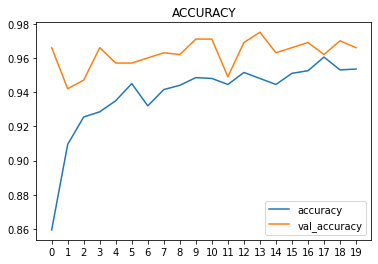

In [21]:
import matplotlib.pyplot as plt

acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,acc,label="accuracy")
plt.plot(epochs,val_acc,label="val_accuracy")
plt.title("ACCURACY")
plt.legend();

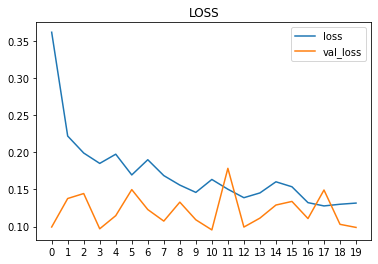

In [24]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(len(acc))
plt.xticks(range(0,20))
plt.plot(epochs,loss,label="loss")
plt.plot(epochs,val_loss,label="val_loss")
plt.title("LOSS")
plt.legend();